In [1]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import seaborn as sn
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import os
import umap
import pandas as pd
import scipy
from scipy import stats
from scipy.spatial import distance
from scipy.cluster import hierarchy
import networkx as nx



In [2]:

#conda install -c conda-forge pycairo

import igraph as ig
import leidenalg as la

In [3]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer, Rotator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [4]:
os.getcwd()

'/Users/jianqiuzhang/Documents/Psychology/duckworth-grit-scale-data'

In [5]:
# load data
data_read = pd.read_table('/Users/jianqiuzhang/Documents/Psychology/BIG5/data.csv')
#data_read = pd.read_table('/Users/jianqiuzhang/Documents/Psychology/duckworth-grit-scale-data/data.csv')

col_name = list(data_read.columns)
Big5_names = col_name[col_name.index('E1'):col_name.index('O10')+1]



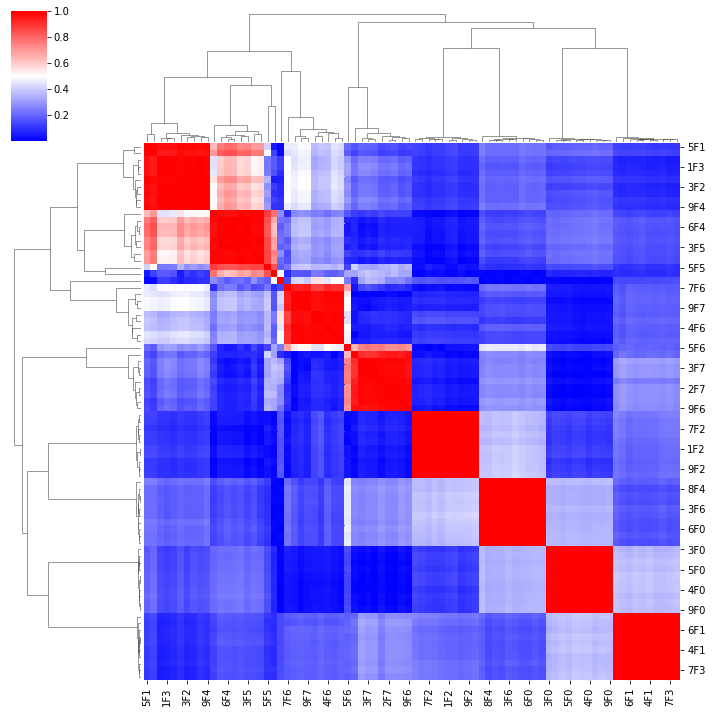

In [6]:
nodes=8
#Specify the file names 
commonname='Big8Layers1Encoder100ReluData2Copy'
commonsub='-FactorLoadings.csv'


col_names1= ['F0','F1','F2','F3','F4','F5','F6','F7']
#First generate factor names from different runs such that XFN stands for the Nth factor from the Nth run.
col_names=col_names1
col_names_all=[]
for i in range(1,11):
    col_names1= ['F0','F1','F2','F3','F4','F5','F6','F7']
    col_names=col_names1
    for k in range(0,nodes):
        col_names[k] = str(i)+col_names1[k]
    if(i==0):
        col_names_all=col_names
    else:
        col_names_all=col_names_all+col_names
        
#Process the first file
file1name1 = commonname+str(1)+commonsub
facLoad=pd.read_csv(file1name1) 
facLoad=facLoad.iloc[:,1:nodes+1]
#If the factors are not rotated, do this. Otherwise, skip this step
rotator = Rotator()
facLoadRotate=rotator.fit_transform(facLoad)
facLoadR=pd.DataFrame(facLoadRotate)
# i is the index for run number, and we
for i in range(2,11):
    file1name = commonname+str(i)+commonsub
    currentfacLoad=pd.read_csv(file1name)     
    currentfacLoad=currentfacLoad.iloc[:,1:nodes+1]
    currentfacLoadRotate=rotator.fit_transform(currentfacLoad)
    currentfactLoadR=pd.DataFrame(currentfacLoadRotate)
    facLoadR= pd.concat([facLoadR, currentfactLoadR], ignore_index=True,axis=1)
    #print(facLoad)
facLoadR.columns=col_names_all
facLoadR.index=Big5_names
# use the correlation between factor loadings as congruence score
loading_corr=facLoadR.corr()   
loading_corr_abs=loading_corr.abs()   
#Study the clusters of all factors from 10 runs
clustergrid=sn.clustermap(loading_corr_abs, cmap='bwr',method='average')
#We can see that 8 clusters emerged

In [47]:
facLoadR

,1F0,1F1,1F2,1F3,1F4,1F5,1F6,1F7,2F0,2F1,...,9F6,9F7,10F0,10F1,10F2,10F3,10F4,10F5,10F6,10F7
E1,0.944670,0.142067,0.018803,-0.002429,-0.088078,0.084280,0.120541,0.185449,0.110529,-0.002576,...,0.193751,0.112938,0.952926,-0.024949,0.106877,0.023027,0.076963,0.116291,-0.181230,-0.123525
E2,-0.965532,-0.213162,0.025358,-0.037342,-0.001338,-0.009874,0.011135,0.167919,-0.016383,0.047809,...,0.181982,-0.004525,-0.957140,0.054772,0.008500,0.036356,-0.016541,-0.205608,-0.168174,-0.010139
E3,0.830293,0.373821,0.173388,-0.031721,-0.349116,-0.025243,0.068324,0.097978,0.342566,0.021065,...,0.106671,0.080549,0.827264,0.020520,0.350897,0.174934,-0.021402,0.362561,-0.097075,-0.083016
E4,-0.953475,-0.102756,-0.045147,0.001999,0.201454,0.004103,0.075142,0.126855,-0.211643,0.012573,...,0.137874,0.074938,-0.951129,0.029310,-0.198541,-0.049441,-0.008417,-0.091996,-0.120915,-0.091483
E5,0.924294,0.326936,0.127693,0.081112,-0.115692,0.039924,0.042119,0.028071,0.128084,-0.083537,...,0.034002,0.054982,0.922702,-0.091075,0.112734,0.121918,0.025484,0.307082,-0.034327,-0.055098
E6,-0.846428,-0.230288,-0.060366,-0.255511,0.122703,-0.140227,0.120660,0.270278,-0.145370,0.283677,...,0.282195,0.106561,-0.843485,0.281407,-0.112123,-0.041730,-0.117426,-0.222864,-0.268225,-0.116189
E7,0.939417,0.261286,0.062375,0.036236,-0.155003,0.002135,0.058188,0.086517,0.166303,-0.048706,...,0.089736,0.058381,0.939725,-0.046503,0.149712,0.059844,-0.008316,0.240266,-0.079857,-0.072879
E8,-0.939706,0.067189,0.079373,0.079278,0.031148,-0.160436,0.049310,-0.009162,-0.047226,-0.066882,...,-0.014377,0.061742,-0.955268,-0.029605,-0.030678,0.085094,-0.162009,0.071289,0.017192,-0.065749
E9,0.941622,0.020695,-0.001783,0.060947,-0.062089,0.176020,0.073628,0.165441,0.074957,-0.068171,...,0.184020,0.059429,0.954035,-0.087447,0.082604,-0.006828,0.159450,0.004490,-0.162929,-0.064684
E10,-0.931055,-0.110932,-0.053123,0.005557,0.257149,0.001163,0.105004,0.060978,-0.263409,0.023040,...,0.069453,0.105361,-0.927001,0.022697,-0.251383,-0.061077,0.001804,-0.115405,-0.051875,-0.115049


In [7]:
#extracts the indices from the correlation matrix, which are the factors
factors = loading_corr.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(loading_corr_abs)

#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  factor names
G = nx.relabel_nodes(G,lambda x: factors[x])



In [8]:
def create_corr_network(G, min_correlation_abs):
    H = G.copy()
##Checks all the edges and removes some based on corr_direction
    for factor1, factor2, weight in G.edges(data=True):
        weight_abs=abs(weight['weight'])
        #print(weight_abs)
        
        if weight_abs < min_correlation_abs or weight_abs==1:
                H.remove_edge(factor1, factor2)
    return H            
       

In [9]:
#Remove edges with correlation less than 0.875
NewG=create_corr_network(G,0.875)
nx.write_graphml(NewG,'graph.graphml') # Export NX graph to file
# read it back in as a graph 
Gix = ig.read('graph.graphml',format="graphml") 

In [10]:
#use the leiden algorithm to find clusters of factors
partition = la.find_partition(Gix, la.ModularityVertexPartition)


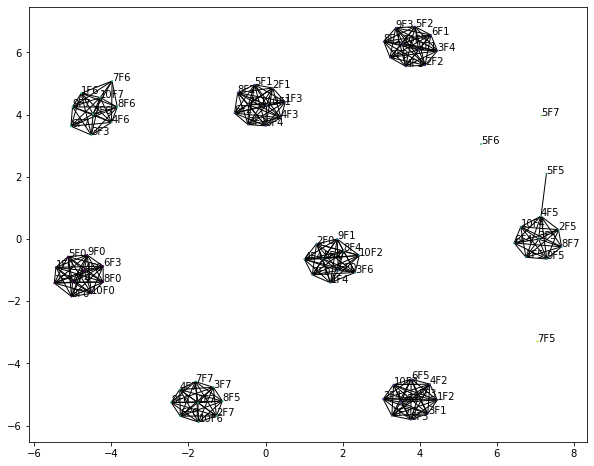

In [11]:
#Display factor clusters based on their correlation
visual_style = {}
visual_style["vertex_size"] = 1
visual_style["vertex_label"] = col_names_all
visual_style["bbox"] = (8000, 8000)
visual_style["margin"] = 400
visual_style["label_size"]=50
fig, ax = plt.subplots(figsize=(10,8))
ig.plot(partition, target=ax,**visual_style)
plt.savefig('Big8Relu100DataRotatedClusters875.pdf',dpi=400)

In [49]:
#Inspect partitions of factor clusters and find the average congruence score
print(partition)
factor_df=pd.DataFrame(col_names_all)
lp=len(partition)
for i in range(lp):
    ids=partition[i]
    number_of_factors=len(ids)
    totaln=number_of_factors*number_of_factors
    totaln2=totaln-number_of_factors
    factorNames=factor_df.iloc[ids]
    print(factorNames)
    #print(ids)
    loading_reordered=loading_corr.iloc[ids,ids]    
    loading_reordered_abs=loading_reordered.abs()
    print((loading_reordered_abs.mean().mean()*(totaln)-number_of_factors)/totaln2)
    #print(loading_reordered)

Clustering with 80 elements and 11 clusters
[ 0] 0, 11, 16, 24, 32, 43, 52, 56, 64, 72
[ 1] 1, 10, 20, 25, 34, 41, 51, 57, 67, 77
[ 2] 3, 9, 18, 27, 33, 42, 49, 58, 68, 73
[ 3] 4, 8, 22, 28, 36, 40, 48, 60, 65, 74
[ 4] 2, 12, 17, 26, 35, 45, 50, 59, 66, 75
[ 5] 5, 13, 21, 29, 37, 44, 63, 69, 76
[ 6] 7, 15, 23, 31, 46, 55, 61, 70, 78
[ 7] 6, 14, 19, 30, 47, 54, 62, 71, 79
[ 8] 38
[ 9] 39
[10] 53
       0
0    1F0
11   2F3
16   3F0
24   4F0
32   5F0
43   6F3
52   7F4
56   8F0
64   9F0
72  10F0
0.9994699401220066
       0
1    1F1
10   2F2
20   3F4
25   4F1
34   5F2
41   6F1
51   7F3
57   8F1
67   9F3
77  10F5
0.9991874192726881
       0
3    1F3
9    2F1
18   3F2
27   4F3
33   5F1
42   6F2
49   7F1
58   8F2
68   9F4
73  10F1
0.9876871155852969
       0
4    1F4
8    2F0
22   3F6
28   4F4
36   5F4
40   6F0
48   7F0
60   8F4
65   9F1
74  10F2
0.9991357281201882
       0
2    1F2
12   2F4
17   3F1
26   4F2
35   5F3
45   6F5
50   7F2
59   8F3
66   9F2
75  10F3
0.9988987066658795
       0
5  

/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
